<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Analysis Techniques**

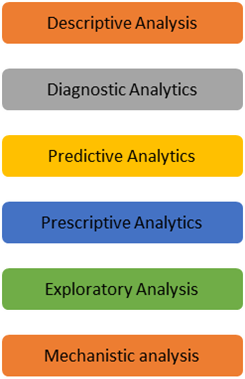

### **Descriptive Analytics**

* What is happening now based on incoming data? 

* It is a method for quantitatively describing the main features of a collection of data. 

* Typically, it is the ﬁrst kind of data analysis performed on a dataset.

* Usually it is applied to large volumes of data, such as census data.

* Description and interpretation processes are different steps.

* Analysts collect quantitative data or translate qualitative data into numbers using large volumes of raw data that needs to be organized and summarized before it can be analyzed. 

### **Dataframes in Data Analysis**

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis. 
# In particular, it offers data structures and operations for manipulating numerical tables and time series. 

import pandas as pd


In [2]:
# Tabulate is an open-source python package/module which is used to print tabular data in nicely formatted tables. 
# It is easy to use and contains a variety of formatting functions.

from tabulate import tabulate


In [ ]:
# A dataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
# You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
# It is generally the most commonly used pandas object.

# Let's create a dataframe from a dictionary and print it

usersDF = pd.DataFrame({
                 'username' :   ['Jack','Jill','Pam','Sam'],
                 'passwd':      [1111, 2222, 3333, 4444],
                 'dept':        ['CSC','MAT','DSS','ART']})

# Display the Dataframe
print(usersDF)


  username  passwd dept
0     Jack    1111  CSC
1     Jill    2222  MAT
2      Pam    3333  DSS
3      Sam    4444  ART


In [ ]:
# Pretty print the dataframe using the fancy_grid format

print(tabulate(usersDF, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════╤══════════╤════════╕
│    │ username   │   passwd │ dept   │
╞════╪════════════╪══════════╪════════╡
│  0 │ Jack       │     1111 │ CSC    │
├────┼────────────┼──────────┼────────┤
│  1 │ Jill       │     2222 │ MAT    │
├────┼────────────┼──────────┼────────┤
│  2 │ Pam        │     3333 │ DSS    │
├────┼────────────┼──────────┼────────┤
│  3 │ Sam        │     4444 │ ART    │
╘════╧════════════╧══════════╧════════╛


# Let's prepare to import a data table from MySQL


In [ ]:
pip install mysql-connector-python

In [ ]:
# Now we can run SQL commands on a remote MySQL database using the connector

import mysql.connector as sql


In [ ]:
# use the same credentials you use to connect to MySQL via Workbench

db_connection = sql.connect(host='208.109.18.154', database='ids1db', user='ids1', password='')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM chickwts')

table_rows = db_cursor.fetchall()

chickDF = pd.DataFrame(table_rows)

print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))


╒════╤═════╤═════╤═══════════╕
│    │   0 │   1 │ 2         │
╞════╪═════╪═════╪═══════════╡
│  0 │   1 │ 179 │ horsebean │
├────┼─────┼─────┼───────────┤
│  1 │   2 │ 160 │ horsebean │
├────┼─────┼─────┼───────────┤
│  2 │   3 │ 136 │ horsebean │
├────┼─────┼─────┼───────────┤
│  3 │   4 │ 227 │ horsebean │
├────┼─────┼─────┼───────────┤
│  4 │   5 │ 217 │ horsebean │
├────┼─────┼─────┼───────────┤
│  5 │   6 │ 168 │ horsebean │
├────┼─────┼─────┼───────────┤
│  6 │   7 │ 108 │ horsebean │
├────┼─────┼─────┼───────────┤
│  7 │   8 │ 124 │ horsebean │
├────┼─────┼─────┼───────────┤
│  8 │   9 │ 143 │ horsebean │
├────┼─────┼─────┼───────────┤
│  9 │  10 │ 140 │ horsebean │
├────┼─────┼─────┼───────────┤
│ 10 │  11 │ 309 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 11 │  12 │ 229 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 12 │  13 │ 181 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 13 │  14 │ 141 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 14 │  15 │ 260 │ linseed   │
├────┼──

In [ ]:
# get some information about the columns in the dataframe
chickDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       71 non-null     int64 
 1   1       71 non-null     int64 
 2   2       71 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [ ]:
# display the first 10 rows
chickDF.head(10)


,0,1,2
0,1,179,horsebean
1,2,160,horsebean
2,3,136,horsebean
3,4,227,horsebean
4,5,217,horsebean
5,6,168,horsebean
6,7,108,horsebean
7,8,124,horsebean
8,9,143,horsebean
9,10,140,horsebean


In [ ]:
# Let’s find out what categories exist in column 2 along with their counts by using the value_counts() method

chickDF[2].value_counts()

soybean      14
linseed      12
sunflower    12
casein       12
meatmeal     11
horsebean    10
Name: 2, dtype: int64

In [ ]:
# Let's find the min of the weights column

chickDF[1].min()

108

In [ ]:
# Create a new dataframe and summarize the wieghts column with a few statistical moments

chickSummaryDF = pd.DataFrame({
                 'Min' :   [chickDF[1].min()],
                 'Max':    [chickDF[1].max()],
                 'Mean':   [chickDF[1].mean()],
                 'STD':    [chickDF[1].std()],
                 'Var':    [chickDF[1].var()], 
                 })

# Display the Summary Dataframe
print(tabulate(chickSummaryDF, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════╤═══════╤════════╤═════════╤════════╕
│    │   Min │   Max │   Mean │     STD │    Var │
╞════╪═══════╪═══════╪════════╪═════════╪════════╡
│  0 │   108 │   423 │ 261.31 │ 78.0737 │ 6095.5 │
╘════╧═══════╧═══════╧════════╧═════════╧════════╛


In [ ]:
#  The 25%, 50%, and 75% rows show the corresponding percentiles which indicates the value below which a given percentage 
# of observations in a group of observations fall

# Use two deciaml places for printing
pd.set_option("display.precision", 2)


chickDF.describe()


,0,1
count,71.00,71.00
mean,36.00,261.31
std,20.64,78.07
min,1.00,108.00
25%,18.50,204.50
50%,36.00,258.00
75%,53.50,323.50
max,71.00,423.00


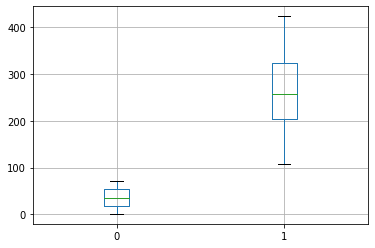

In [ ]:
# A box plot is a method for graphically depicting groups of numerical data through their quartiles. 
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 
# The whiskers extend from the edges of box to show the range of the data. 
# The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. 
# Outlier points are those past the end of the whiskers.


chickDF.boxplot()


In [ ]:
# Let's name our dataframe columns

chickDF.columns = ['Item', 'Weight', 'Feed']

print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))


╒════╤════════╤══════════╤═══════════╕
│    │   Item │   Weight │ Feed      │
╞════╪════════╪══════════╪═══════════╡
│  0 │      1 │      179 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  1 │      2 │      160 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  2 │      3 │      136 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  3 │      4 │      227 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  4 │      5 │      217 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  5 │      6 │      168 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  6 │      7 │      108 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  7 │      8 │      124 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  8 │      9 │      143 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  9 │     10 │      140 │ horsebean │
├────┼────────┼──────────┼───────────┤
│ 10 │     11 │      309 │ linseed   │
├────┼────────┼──────────┼───────────┤
│ 11 │     12 │      229 

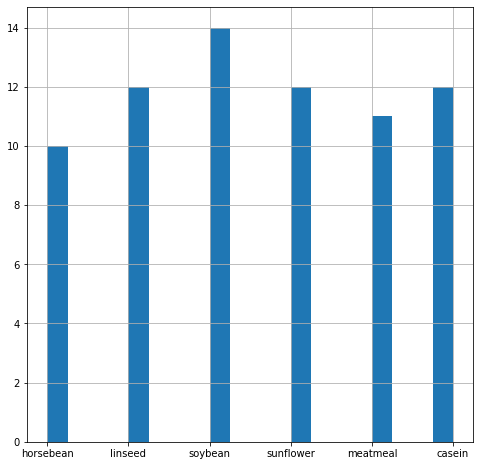

In [ ]:
# Attributes that are tail-heavy make it hard for some ML algorithms to perform well.
# We can transform these attributes (e.g. log normal) to have more bell-shaped distributions.


import matplotlib.pyplot as plt

chickDF['Feed'].hist(bins=20, figsize=(8,8))
plt.show()


In [ ]:
# Let's drop the Item column since we won't need it

del chickDF['Item']


In [ ]:
print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═══════════╕
│    │   Weight │ Feed      │
╞════╪══════════╪═══════════╡
│  0 │      179 │ horsebean │
├────┼──────────┼───────────┤
│  1 │      160 │ horsebean │
├────┼──────────┼───────────┤
│  2 │      136 │ horsebean │
├────┼──────────┼───────────┤
│  3 │      227 │ horsebean │
├────┼──────────┼───────────┤
│  4 │      217 │ horsebean │
├────┼──────────┼───────────┤
│  5 │      168 │ horsebean │
├────┼──────────┼───────────┤
│  6 │      108 │ horsebean │
├────┼──────────┼───────────┤
│  7 │      124 │ horsebean │
├────┼──────────┼───────────┤
│  8 │      143 │ horsebean │
├────┼──────────┼───────────┤
│  9 │      140 │ horsebean │
├────┼──────────┼───────────┤
│ 10 │      309 │ linseed   │
├────┼──────────┼───────────┤
│ 11 │      229 │ linseed   │
├────┼──────────┼───────────┤
│ 12 │      181 │ linseed   │
├────┼──────────┼───────────┤
│ 13 │      141 │ linseed   │
├────┼──────────┼───────────┤
│ 14 │      260 │ linseed   │
├────┼──────────┼───────────┤
│ 15 │    

In [ ]:
# Sort the Feed groups based on count or size

chickDF.groupby(['Feed']).size().sort_values(ascending=False)


Feed
soybean      14
casein       12
linseed      12
sunflower    12
meatmeal     11
horsebean    10
dtype: int64

In [ ]:
# Compute the average for each Feed group

chickDF.groupby(['Feed']).mean()


,Weight
Feed,
casein,323.58
horsebean,160.20
linseed,218.75
meatmeal,276.91
soybean,246.43
sunflower,328.92


### **Example**: **Census data is a way to describe a population**

In [ ]:
pip install censusdata

     |████████████████████████████████| 26.6 MB 2.0 MB/s 
  Created wheel for censusdata: filename=CensusData-1.15-py3-none-any.whl size=28205534 sha256=c00038ed66871cfb71290dba7e858fc09dc76792aa77cf01ae4b676b3d2115e7
  Stored in directory: /root/.cache/pip/wheels/17/11/8c/933901298f486bd414f2ab1a62a114085f7d7a19dcbda2dd08
Successfully built censusdata


In [ ]:
import censusdata

In [ ]:
# DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
# You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
# It is generally the most commonly used pandas object.

censusDF = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '36'), ('county', '*')]),
           ['B08301_001E', 'B08301_010E'])

* **acs5** refers to the 5 Year American Community Survey and designates the database we are downloading from.
* 2015 is the year that we are getting data from
* censusdata.censusgeo([(**‘state’**, ‘36’), (**‘county’**, ‘*’)]) defines the geography we are interested in. 
* The ‘36’ value is the FIPS (Federal Information Processing Standards) code for New York state while the ‘*’ means we want every county. 
* To look up your own state or county FIPS code refer to the Wikipedia page.
* [‘B08301_001E’, ‘B08301_010E’]  is a list referring to the specific two tables that we are interested in. 

In [ ]:
# Let's examine the contents of the census datafarme in various formats

print(tabulate(censusDF, headers='keys', tablefmt='psql'))



+-------------------------------------------------------------------------+------------------+---------------+
|                                                                         |      B08301_001E |   B08301_010E |
|-------------------------------------------------------------------------+------------------+---------------|
| Schoharie County, New York: Summary level: 050, state:36> county:095    |  13742           |           200 |
| Fulton County, New York: Summary level: 050, state:36> county:035       |  23546           |           141 |
| Rensselaer County, New York: Summary level: 050, state:36> county:083   |  78398           |          1757 |
| Franklin County, New York: Summary level: 050, state:36> county:033     |  19534           |           136 |
| Queens County, New York: Summary level: 050, state:36> county:081       |      1.07675e+06 |        562857 |
| Washington County, New York: Summary level: 050, state:36> county:115   |  27979           |           240 |
|

In [ ]:
# Pretty print the census dataframe in grid format

print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════════════════════════════════════════════════════════╤══════════════════╤═══════════════╕
│                                                                         │      B08301_001E │   B08301_010E │
╞═════════════════════════════════════════════════════════════════════════╪══════════════════╪═══════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │  13742           │           200 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │  23546           │           141 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│ Rensselaer County, New York: Summary level: 050, state:36> county:083   │  78398           │          1757 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│

In [ ]:
# The data still looks cumbersome to read and interpret.
# Let's first change the cryptic column names so they reflect theor contents

# Note that the first column is the index
censusDF.columns = ['Total_Transportation', 'Total_Public_Transportation']


print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))



╒═════════════════════════════════════════════════════════════════════════╤════════════════════════╤═══════════════════════════════╕
│                                                                         │   Total_Transportation │   Total_Public_Transportation │
╞═════════════════════════════════════════════════════════════════════════╪════════════════════════╪═══════════════════════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │        13742           │                           200 │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────┼───────────────────────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │        23546           │                           141 │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────┼───────────────────────────────┤
│ Rensselaer County, New York: Summary level: 050, state:36> county:0

In [ ]:
# Let's add a new column that expresses the ratio of public transit
# Note that axis=0 means 'row' and axis=1 means 'column'

censusDF['Percent_Public_Transit'] = censusDF.apply(
    lambda row: row['Total_Public_Transportation']/row['Total_Transportation'],  
    axis = 1)    

print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))




╒═════════════════════════════════════════════════════════════════════════╤════════════════════════╤═══════════════════════════════╤══════════════════════════╕
│                                                                         │   Total_Transportation │   Total_Public_Transportation │   Percent_Public_Transit │
╞═════════════════════════════════════════════════════════════════════════╪════════════════════════╪═══════════════════════════════╪══════════════════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │        13742           │                           200 │               0.0145539  │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────┼───────────────────────────────┼──────────────────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │        23546           │                           141 │               0.00598828 │
├───────────────────────────────────────

In [ ]:
# Let's take a closer look at the index entries

censusDF.index.tolist()


[censusgeo((('state', '36'), ('county', '095')), 'Schoharie County, New York'),
 censusgeo((('state', '36'), ('county', '035')), 'Fulton County, New York'),
 censusgeo((('state', '36'), ('county', '083')), 'Rensselaer County, New York'),
 censusgeo((('state', '36'), ('county', '033')), 'Franklin County, New York'),
 censusgeo((('state', '36'), ('county', '081')), 'Queens County, New York'),
 censusgeo((('state', '36'), ('county', '115')), 'Washington County, New York'),
 censusgeo((('state', '36'), ('county', '061')), 'New York County, New York'),
 censusgeo((('state', '36'), ('county', '011')), 'Cayuga County, New York'),
 censusgeo((('state', '36'), ('county', '087')), 'Rockland County, New York'),
 censusgeo((('state', '36'), ('county', '063')), 'Niagara County, New York'),
 censusgeo((('state', '36'), ('county', '031')), 'Essex County, New York'),
 censusgeo((('state', '36'), ('county', '059')), 'Nassau County, New York'),
 censusgeo((('state', '36'), ('county', '045')), 'Jefferson

In [ ]:
# The indices are messy so let's clean them up by extracting the county name
# from geospatial data


new_indices = []
county_names = []

for index in censusDF.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)

censusDF.index = new_indices
censusDF['County_Name'] = county_names




In [ ]:
# Let's take another look at the sorted dataframe (by County_Name)
# Federal Information Processing System (FIPS) codes are numbers which uniquely identify geographic areas. 
# The number of digits in FIPS codes vary depending on the level of geography. 
# State-level FIPS codes have two digits, county-level FIPS codes have five digits of which the first 
# two are the FIPS code of the state to which the county belongs.

print(tabulate(censusDF.sort_values(by=['County_Name']), headers='keys', tablefmt='fancy_grid'))



╒═══════╤════════════════════════╤═══════════════════════════════╤══════════════════════════╤═════════════════════╕
│       │   Total_Transportation │   Total_Public_Transportation │   Percent_Public_Transit │ County_Name         │
╞═══════╪════════════════════════╪═══════════════════════════════╪══════════════════════════╪═════════════════════╡
│ 36001 │                 152554 │                          8735 │               0.0572584  │ Albany County       │
├───────┼────────────────────────┼───────────────────────────────┼──────────────────────────┼─────────────────────┤
│ 36003 │                  19804 │                           122 │               0.00616037 │ Allegany County     │
├───────┼────────────────────────┼───────────────────────────────┼──────────────────────────┼─────────────────────┤
│ 36005 │                 547961 │                        327310 │               0.597324   │ Bronx County        │
├───────┼────────────────────────┼───────────────────────────────┼──────

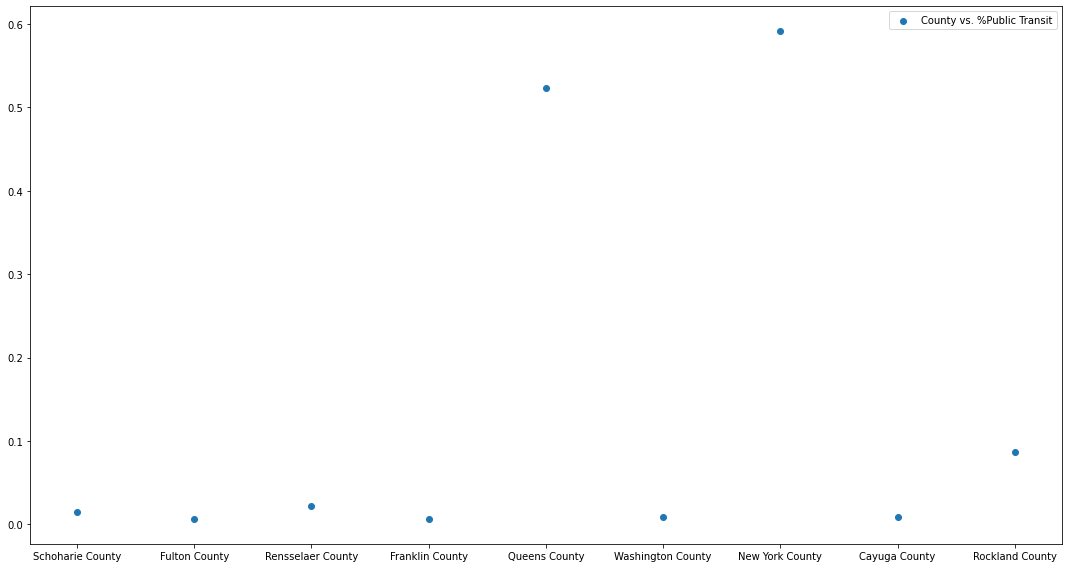

In [ ]:
# Let's plot the columns from the dataframe

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

# pick only 9 counties to display
subCensusDF = censusDF.iloc[0:9]

plt.scatter(subCensusDF['County_Name'], subCensusDF['Percent_Public_Transit'], label="County vs. %Public Transit")
plt.legend()


plt.show()



### **Decsriptive Analysis**

* Frequency Distribution
* Measures of Centrality
* Dispersion of a Distribution



### **Frequency Distribution**

Histograms plot values of observations on the horizontal axis, with a bar
showing how many times each value occurred in the dataset. Let us take a look at an example of how a histogram can be crafted out of a dataset. 

 


**Example**:

* The following dataset represents Productivity measured in terms of output for a group of data science professionals: https://raw.githubusercontent.com/bforoura/IDS/main/productivity.json 

* Some of them went through extensive statistics training (represented as “Y” in the Training column) while others did not (N). 

* The dataset also contains the work experience (denoted as Experience) of each professional in terms of number of working hours.

In [ ]:
# Let's import the JSON file and inspect it

import json
from urllib.request import urlopen


# store the URL in url as parameter for urlopen
url = "https://raw.githubusercontent.com/bforoura/IDS/main/productivity.json"
  
# store the response of URL
response = urlopen(url)
  
# converting the JSON response to a dataframe
dataDF = pd.DataFrame(json.loads(response.read()))
  
# print the json response
print(dataDF)




    Productivity  Experience Training
0              5           1        Y
1              2           0        N
2             10          10        Y
3              4           5        Y
4              6           5        Y
5             12          15        Y
6              5          10        Y
7              6           2        Y
8              4           4        Y
9              3           5        N
10             9           5        Y
11             8          10        Y
12            11          15        Y
13            13          19        Y
14             4           5        N
15             5           7        N
16             7          12        Y
17             8          15        N
18            12          20        Y
19             3           5        N
20            15          20        Y
21             8          16        N
22             4           9        N
23             6          17        Y
24             9          13        Y
25          

In [ ]:
# Let's inspect the size of the dataframe

dataDF.shape



(30, 3)

In [ ]:
# The column data types

dataDF.dtypes



Productivity     int64
Experience       int64
Training        object
dtype: object

In [ ]:
# Let's inspect the numeric columns and their values

dataDF.describe()



,Productivity,Experience
count,30.000000,30.0
mean,7.266667,10.0
std,3.453467,6.0
min,2.000000,0.0
25%,5.000000,5.0
50%,6.500000,9.5
75%,9.000000,15.0
max,15.000000,20.0


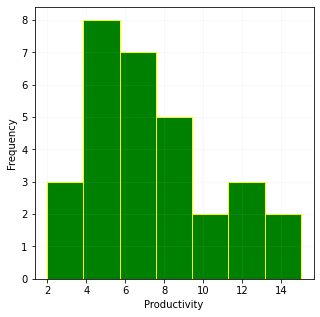

In [ ]:
# Let's generate the histogram for Productivity

import matplotlib.pyplot as plt

# To construct a histogram, the first step is to “bin” the range of values — that is, divide the 
# entire range of values into a series of intervals — and then count how many values fall into each 
# interval. 
plt.figure(figsize=(5, 5))
plt.hist(dataDF['Productivity'], bins=7, color="green", edgecolor="yellow")

plt.xlabel('Productivity')
plt.ylabel('Frequency')

# alpha is the % of transparency
plt.grid(axis='y', alpha=0.1)
plt.grid(axis='x', alpha=0.1)

plt.show()



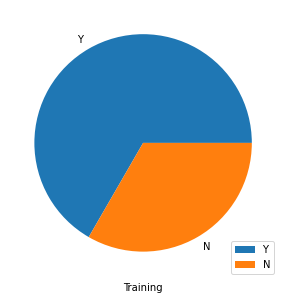

In [ ]:
# Let's draw the Pie chart showing the distribution of “Training” in the Productivity data.

mylabels = ["Y", "N"]
plt.figure(figsize=(5, 5))
plt.pie(dataDF['Training'].value_counts(), labels = mylabels)

plt.xlabel('Training')
plt.legend(loc="lower right")

plt.show()




###**Normal Distribution**

In an ideal world, data would be distributed symmetrically around
the center of all scores. Thus, if we drew a vertical line through the center of a distribution, both sides should look the same. This so-called **normal distribution** is characterized by a bell-shaped curve, an example of which is shown below:

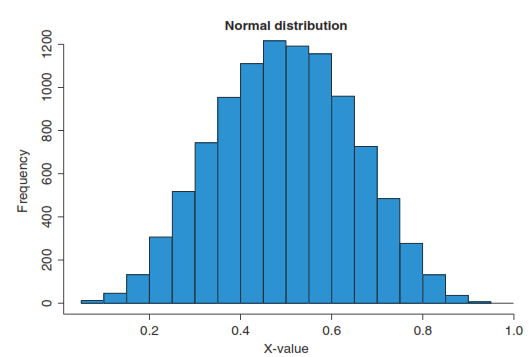





### **Deviations from Normal Distribution**

There are two ways in which a distribution can deviate from normal:

* Lack of symmetry (called **skew**)
* Pointiness (called **kurtosis**)

A skewed distribution can be either **positively** or **negatively skewed**:


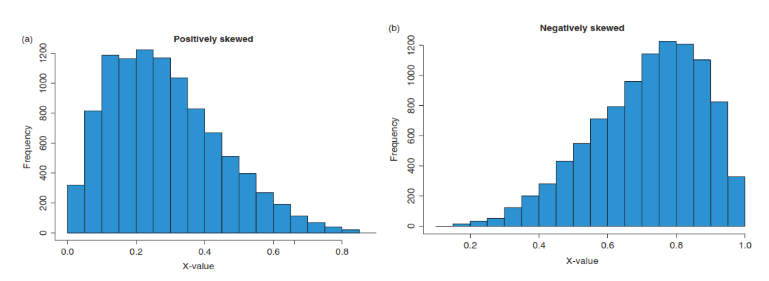



**Kurtosis**, on the other hand, refers to the degree to which scores cluster at the end of a distribution and how **pointy** a distribution is:

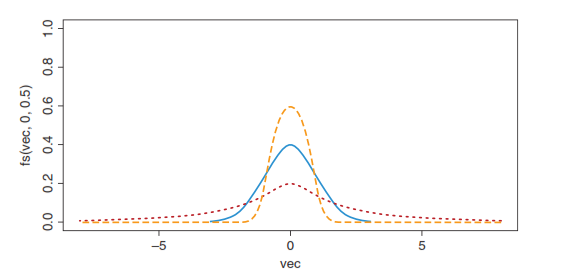


### **Measures of Centrality**

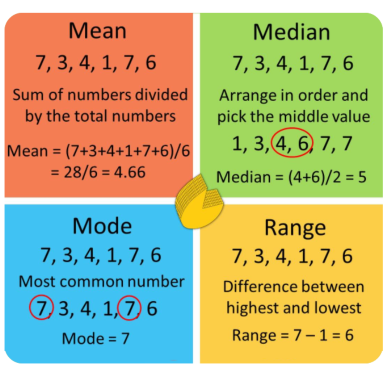


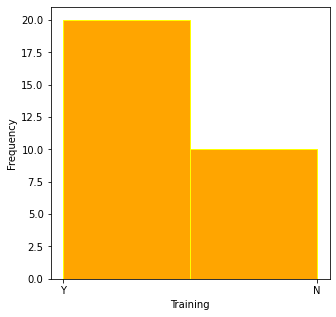

In [ ]:
# As depicted below, in the Productivity dataset, there are 10 instances of N 
# and 20 instances of Y values in Training. So, in this case, the mode for 
# Training is Y. 

# Note: If the number of instances of Y and N are the same, then there would be 
# no mode for Training.


plt.figure(figsize=(5, 5))
plt.hist(dataDF['Training'], bins=2, color="orange", edgecolor="yellow")

plt.xlabel('Training')
plt.ylabel('Frequency')

plt.show()



### **Dispersion of a Distribution**

* Simply looking at a central point (mean, median, or mode) may not help in understanding the actual shape of a distribution. 

* Therefore, we often look at the spread, or the dispersion, of a distribution.
* A **boxplot** is common technique for examining dispersion.

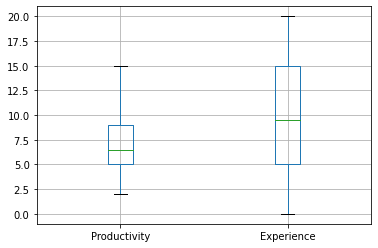

In [ ]:
# As shown in the boxplot for the “Experience” attribute, after removing the top 
# one-fourth values (between 5 and 20) and bottom one-fourth (close to zero to 5), 
# the range of the remaining data can be calculated 0 (from 5 to 15). 

# Likewise, the interquartile range of the “Productivity” attribute can be 
# calculated as 5.

dataDF.boxplot()



### **Variance**

* A measure used to indicate how spread out the data points are. 

* To measure the variance, the common method is to pick a center of the distribution, typically the mean, then measure how far each data point is from the center. 

* If the individual observations vary greatly from the group mean, the variance is big; and vice versa. 

* It is important to distinguish between the variance of a **population** and the variance of a **sample**. 

* They have different notations, and they are computed differently. The variance of a population is denoted by **σ^2** and the variance of a sample by **s^2**

* Using these formulas, the variance of the sample is an unbiased estimate of the variance of the population:



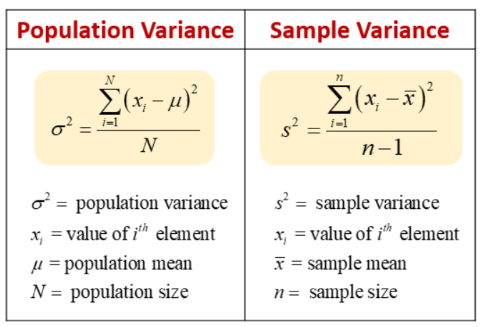





In [ ]:
# using  the dataframe's bulit-in variance 

dataDF.var()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Productivity    11.926437
Experience      36.000000
dtype: float64

In [ ]:
# calculating the sample variances using our own function

##########################
def variance(observations):

    mean = sum(observations) / len(observations)
    squared_differences = 0

    for number in observations:
        difference = mean - number
        squared_difference = difference ** 2
        squared_differences += squared_difference
    
    variance = squared_differences / (len(observations) - 1)
    return variance
##########################


print("Productivity: ", variance(dataDF['Productivity']))
print("Experience: ", variance(dataDF['Experience']))




Productivity:  11.926436781609196
Experience:  36.0


### **Standard Deviation**

* There is one issue with the variance as a measure. 

* It gives us the measure of spread in units squared. So, for example, if we measure the variance of age (measured in years) of all the students in a class, the measure we will get will be in years^2

* However, it would make more sense if we got the measure in years (not years squared). For this reason, we often take the square root of the variance, which ensures the measure of average spread is in the same units as the original measure:

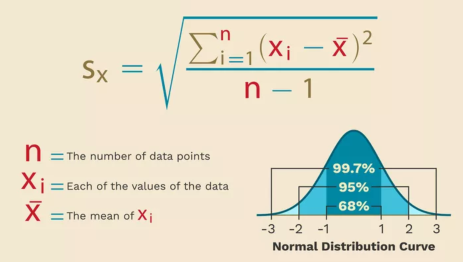



In [ ]:
# display var and std values for the two numeric columns

print("Productivity: ", dataDF['Productivity'].var(), dataDF['Productivity'].std())

print("Experience: ", dataDF['Experience'].var(), dataDF['Experience'].std())



Productivity:  11.926436781609196 3.453467356383899
Experience:  36.0 6.0


In [ ]:
# selecting subsets of a dataframe using conditionals

# How many have at least 10 years of experience?
dataDF.loc[dataDF["Experience"] >= 10]




,Productivity,Experience,Training
2,10,10,Y
5,12,15,Y
6,5,10,Y
11,8,10,Y
12,11,15,Y
13,13,19,Y
16,7,12,Y
17,8,15,N
18,12,20,Y
20,15,20,Y


In [ ]:
# selecting subsets of a dataframe using conditionals

# Among those with at least 10 years of experience, how many
# had training and how many did not?
dataDF.loc[dataDF["Experience"] >= 10, "Training"].value_counts()



Y    12
N     3
Name: Training, dtype: int64

### **Comparing Distributions and Hypothesis Testing**

* Often there is a need to compare diﬀerent distributions to derive some important insights or make decisions.

* For instance, we want to see if our new strategy for marketing is changing our customers’ spending behaviors from the last month to this month. 

* Let's assume that we have data about each customer’s spending amounts for both of these months. Using that data, we can plot a histogram per month that shows on the x-axis the number of customers and on the y-axis the amount they spent in that month. 

* Now the question is: **Are these two plots diﬀerent enough to say that the new marketing strategy is eﬀective?**

* This is not something that can be easily answered by visual inspection. 

* For this, there are several statistical tests that one could run that compare the two distributions and tell us if they are diﬀerent.

* Normally, for this, we begin by stating our **hypotheses**. 

* A hypothesis is a way to state our assumption or belief that could be tested.

* The default knowledge or assumption could be stated as a **null hypothesis** and the opposite of that is called the **alternative hypothesis**. 

* The  **null hypothesis:** There is no diﬀerence between the two distributions

* The **alternative hypothesis:** There is indeed a diﬀerence.

* **Example**:
* ==> Null hypothesis H0: µ= 10 tons
* ==> Alternative hypothesis Ha: µ>10 tons



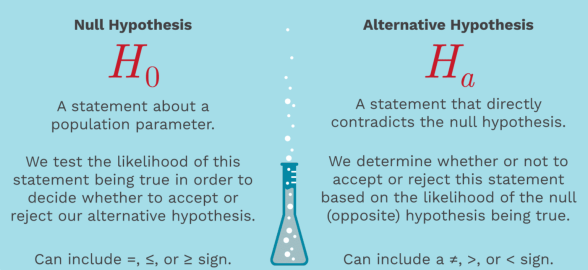



### **Diagnostic Analytics**

* Diagnostic analytics are used for discovery, or to determine **why something happened**.

* Sometimes this type of analytics when done hands-on with a small dataset is also known as **causal analysis**, since it involves at least one cause (usually more than one) and one effect.

**Example**: For a social media marketing campaign, you can use **descriptive analytics** to assess the number of posts, mentions, followers, fans, page views, reviews, or pins, etc. There can be thousands of online mentions that can be distilled into a single view to see what worked and what did not work in your past campaigns. In the next stage, you can use **diagnostic alnalytics** to find out why a certain outcome happened.


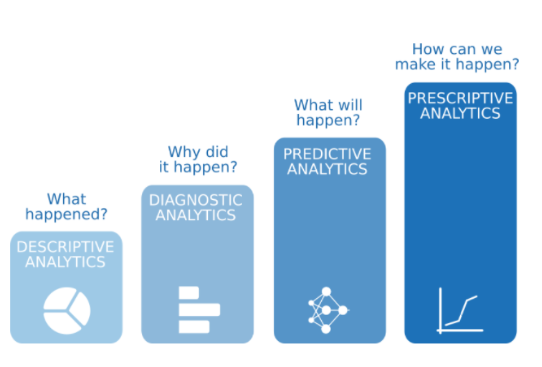


### **Covariance**

* Variables can be related by a **linear relationship**. This is a relationship that is consistently additive across the two data samples.

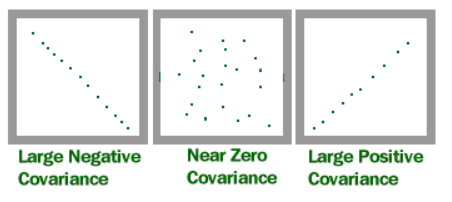

* This relationship can be summarized between two or more variables in a covariance matrix.

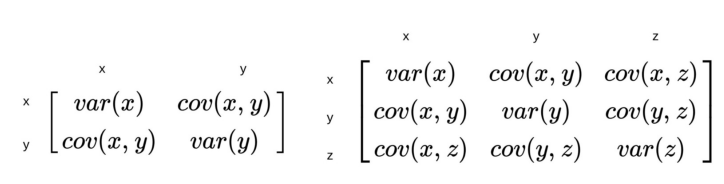



* It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

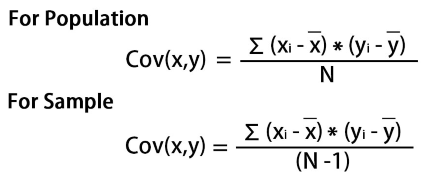

In [ ]:
# NumPy is a library for the Python programming language, adding support for 
# large, multi-dimensional arrays and matrices, along with a large collection of 
# high-level mathematical functions to operate on these arrays

from numpy import cov

data1 = dataDF['Experience']
data2 = dataDF['Productivity']

# calculate covariance matrix
covariance = cov(data1, data2)

print(covariance)



[[36.         16.24137931]
 [16.24137931 11.92643678]]


### **Results**

* The covariance between the two variables is 16.24. 

* We can see that it is positive, suggesting the variables change in the same direction as we expect.

* A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.



### **Correlations**

* Correlation is a statistical analysis that is used to measure and describe the **strength and direction of the relationship between two variables**. 

* **Strength** indicates how closely two variables are related to each other, and **direction** indicates how one variable would change its value as the value of the other variable changes.

* Take, for example, “umbrella” and “rain.” If someone who grew up in a place where it never rained saw rain for the ﬁrst time, this person would observe that, whenever it rains, people use umbrellas. They may also notice that, on
dry days, folks do not carry umbrellas. 

* By deﬁnition, “rain” and “umbrella” are said to be correlated! 

* An important statistic, the **Pearson’s r correlation**, is widely used to measure the degree of the relationship between linear related variables. 

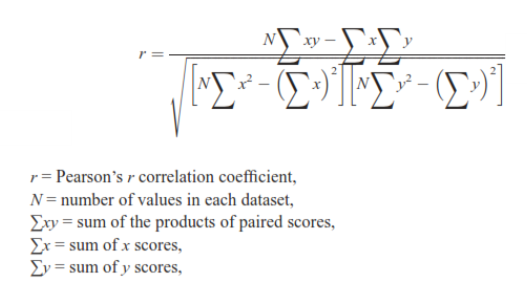

* E.g. When examining the stock market, the Pearson’s r correlation can measure the degree to which two commodities are related. 

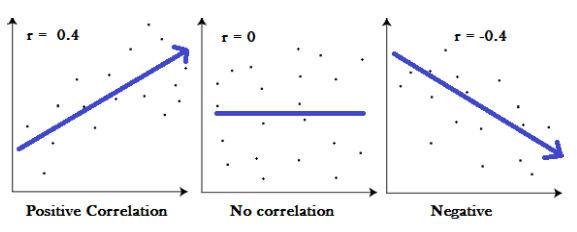

* Alternatively:

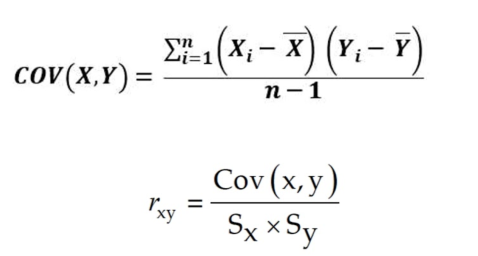




In [ ]:
# calculate Pearson's correlation

# SciPy is an open-source Python library which is used to solve scientific and 
# mathematical problems. It is built on the NumPy extension and allows the user 
# to manipulate and visualize data with a wide range of high-level commands.
from scipy.stats import pearsonr


# This returns two values: Pearson correlation coefficient and p-value for 
# testing non-correlation

data1 = dataDF['Experience']
data2 = dataDF['Productivity']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)



Pearsons correlation: 0.78382


### **Results**

* We can see that the two variables are positively correlated and that the correlation is 0.784. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

* The Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

* This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a **correlation matrix** with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.



In [ ]:
# Let's use Pandas to compute the correlation matrix

dataDF.corr()



,Productivity,Experience
Productivity,1.00000,0.78382
Experience,0.78382,1.00000


### **Predictive Analytics**

* Predictive analytics has its roots in our ability to **predict what might happen**.

* These analytics are about **understanding the future** using the data and the
trends we have seen in the past, as well as emerging new contexts and processes. 

* E.g. Predict how people will spend their tax refunds based on how
consumers normally behave around a given time of the year (**past data and trends**), and how a new tax policy (new context) may affect people’s refunds.

* Predictive analytics provides companies with **actionable insights** based on data. 

* It is important to remember that no statistical algorithm can “predict” the future with 100% certainty because the foundation of predictive analytics is based on **probabilities**. 

* Companies use these statistics to forecast what might happen. Some of the software most commonly used by data science professionals for predictive analytics are SAS predictive analytics, IBM predictive analytics, RapidMiner, etc.

* Predictive analytics is done in stages:

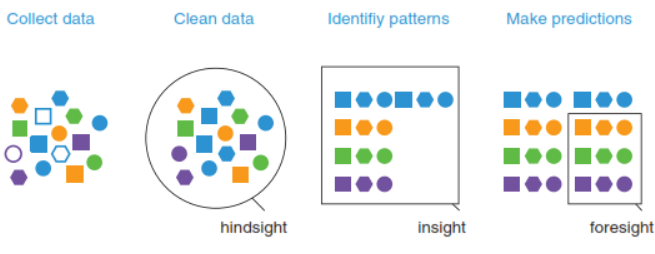


* Application 1: **Customer relationship management (CRM)** classiﬁes another common area for predictive analytics. Here, the process contributes to objectives such as marketing campaigns, sales, and customer service. 

* Application 2: Predictive analytics is also used in the **healthcare ﬁeld.** It can determine which patients are at risk for developing certain conditions such as diabetes, asthma, and other chronic or serious illnesses.




### **Prescriptive Analytics**

* The area of business analytics dedicated to ﬁnding **the best
course of action for a given situation.**

* This may start by ﬁrst analyzing the situation (using descriptive analysis), but then moves toward ﬁnding connections among various parameters/variables,
and their relation to each other to address a speciﬁc problem, more likely
that of prediction.

* A process-intensive task, the prescriptive approach analyzes potential decisions, the interactions between decisions, the inﬂuences that bear upon these decisions, and the bearing all of this has on an outcome to ultimately prescribe an optimal course of action in real time.

* Prescriptive analytics can also suggest options for taking advantage of a future opportunity or mitigate a future risk and illustrate the implications of each. In practice, prescriptive analytics can continually and automatically process new data to improve the accuracy of predictions and provide advantageous decision options.

### **Exploratory Analysis**

* Often when working with data, we may not have a clear understanding of the problem or the situation. And yet, we may be called on to provide some insights. 

* In other words, we are asked to provide an answer without knowing the question! 

* This is where we go for an exploration!

* Exploratory analysis is an approach to analyzing datasets to ﬁnd previously
unknown relationships. Often such analysis involves using various **data visualization** approaches.

* When we lack a clear question or a hypothesis, **plotting the data in different forms** could provide us with some clues regarding what we may ﬁnd or want to ﬁnd in the data. 

* Such insights can then be useful for deﬁning future studies/questions, leading to other forms of analysis.

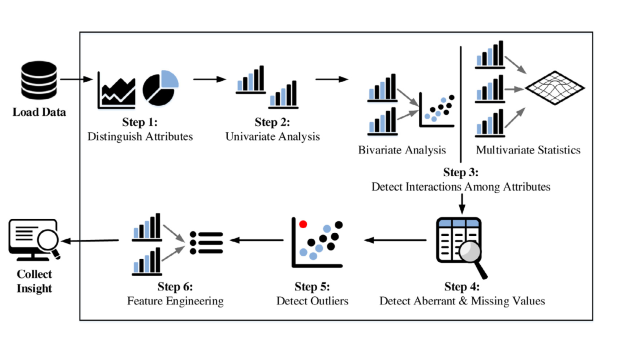

### **Regression (Mechanistic Analysis)**

* Regression analysis is a process for **estimating the relationships
among variables.** 

* Given this deﬁnition, you may wonder how regression differs from
correlation. 

* The answer can be found in the limitations of correlation analysis.
Correlation by itself does not provide any indication of how one variable can be predicted from another. 

* Beyond estimating a relationship, regression analysis is a way of predicting an outcome variable from one predictor variable (simple linear regression) or several predictor variables (multiple linear regression). 

* **Linear regression**, the most common form of regression used in data analysis, assumes this relationship to be linear. 

* The relationship of the predictor variable(s) and outcome variable can be expressed by a straight line. If the predictor variable is represented by x, and the outcome variable is represented by y, then the relationship can be expressed by the equation: **y = β0 + β1 *x**

* Here, **β1 is the slope** and **β0 is the intercept (error)** term.

* From statistical analysis, it has been shown that the slope of the regression 
can be expressed by the following equation:

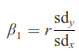

* In above, **r is the Pearson’s correlation coefﬁcient**, and **sd represents the standard deviation of the respective variable** as calculated from the observed set of data points. 

* Next, the value of the error term can be calculated from the following formula:

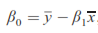










### **Mean Squared Error**

* The **mean squared error (MSE)** indicates you how close a regression line is to a set of points. 

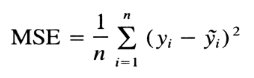

* It does this by taking the distances from the points to the regression line (these distances are the **errors**) and squaring them. 
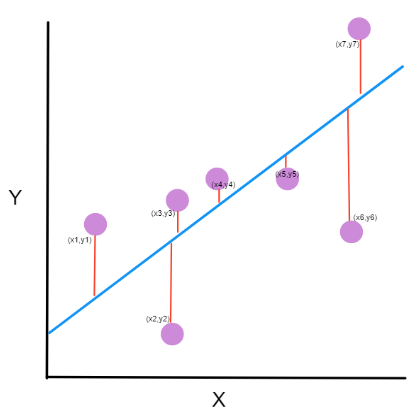



* The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. 

* It’s called the mean squared error as you’re finding the average of a set of errors. 

* **The lower the MSE, the better the forecast.**







### **Coefficient of Determination (R^2)**

* In statistics, the coefficient of determination, denoted R^2 or r^2 and pronounced **R squared**, is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

* The **R-Squared formula** compares our fitted regression line to a baseline model. This baseline model is considered the **worst** model. 

* The **baseline model is a flat-line that predicts every value of y will be the mean value of y**.

* R-Squared checks to see if our fitted regression line will predict y better than the mean will.

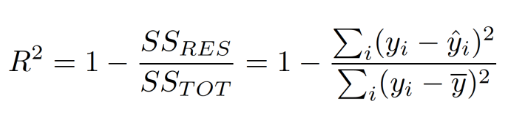

* The top of the formula, is the **Residual sum of squared errors of our regression model (SSres)**. So if the actual y value was 5 but we had predicted it would be 6 then the residual squared error would be 1 and we would add that to the rest of the residual squared errors for the model.

* The bottom of the  formula is the **total sum of squared errors (SStot)**. This is comparing the actual y values to our baseline model the mean. So we square the difference between the all the actual y values and the mean and add them together.




### **Regression Model Performance: Error Rates**
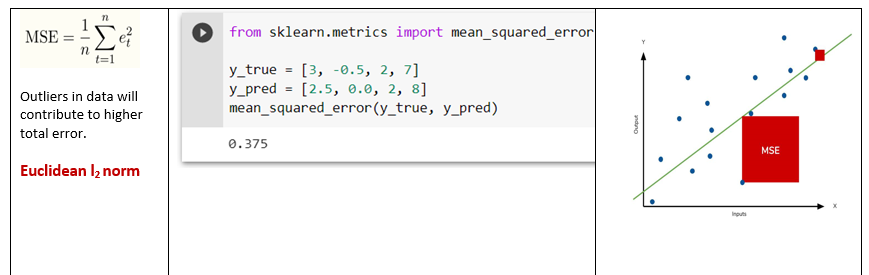
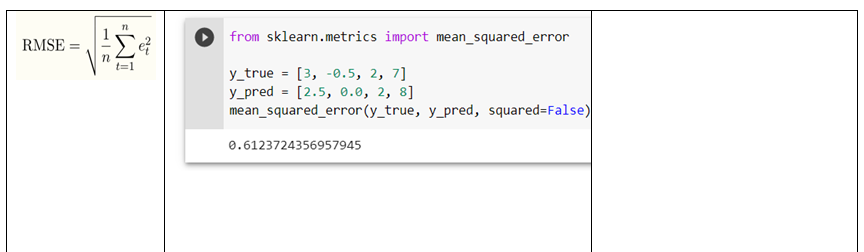

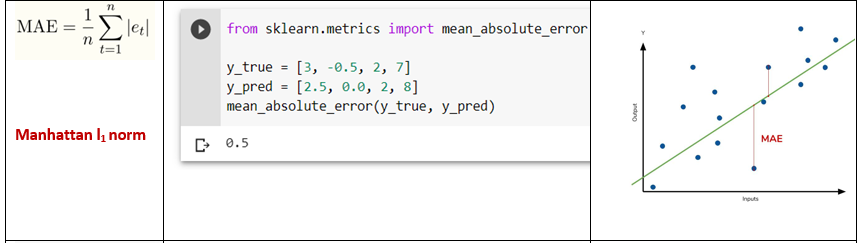

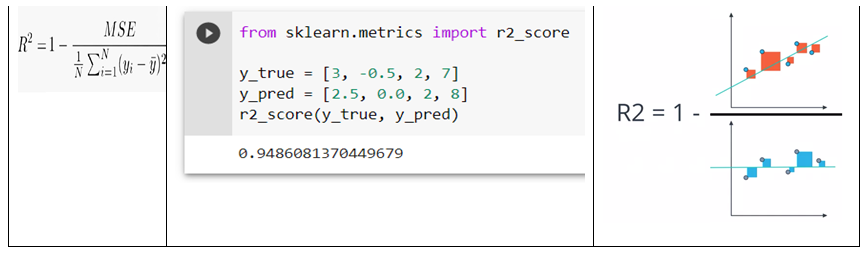









### **Example: Linear Regression**



In [13]:
# The sklearn library contains a lot of efficient tools for machine learning and 
# statistical modeling including classification, regression, clustering and 
# dimensionality reduction.
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt  # To visualize

# Reaf the CSV dataset
LRdata = pd.read_csv('https://raw.githubusercontent.com/bforoura/IDS/main/LRdata.csv')

LRdata.head()



,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [16]:
# Let's verify the size of the dataset

LRdata.shape




(99, 2)

### **References**
* A Hands-On Introduction to Data Science, Chirag Shah, Cambridge University Press 
* https://towardsdatascience.com/mapping-us-census-data-with-python-607df3de4b9c

* https://thispointer.com/pretty-print-a-pandas-dataframe/#psql-format
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* https://www.w3resource.com/pandas/dataframe/dataframe-boxplot.php
* https://plotly.com/python/county-choropleth/
* https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html
* https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
* https://en.wikipedia.org/wiki/Coefficient_of_determination


